# Linear Regression Notebook
### Author: Krzysztof Chmielewski

This notebook demonstrates a minimal linear regression workflow: generating synthetic data, implementing a closed-form linear regressor, comparing it with scikit-learn's `LinearRegression`, and visualising results.

## Model Purpose and Applications

**Linear Regression** is a fundamental supervised learning algorithm for **continuous value prediction** (regression problems). It models the relationship between input features and a continuous target variable as a linear combination.

### Key Use Cases:
- **Sales forecasting**: Predicting future sales based on historical trends
- **Real estate pricing**: Estimating house prices from features (size, location, age)
- **Stock price prediction**: Modeling price trends over time
- **Weather forecasting**: Predicting temperature or rainfall
- **Medical/scientific research**: Analyzing relationships between variables
- **Trend analysis**: Understanding how one variable changes with another

### Strengths:
- Simple, interpretable, and fast
- Works well when data has a linear relationship
- Low computational cost
- Good baseline model

### Limitations:
- Assumes linear relationship (may underfit complex data)
- Sensitive to outliers
- Cannot capture non-linear patterns without feature engineering

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [126]:
def plot_regression(model, X: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    print(f"RMSE on test set: {rmse_train:.4f}")
    print(f"RMSE on test set: {rmse_test:.4f}")

    if hasattr(model, "coef_"):
        print(f"Estimated slope: {model.coef_[0][0]:.4f}")
        print(f"Estimated intercept: {model.intercept_[0]:.4f}")
    else:
        print(f"Estimated slope: {model.a:.4f}")
        print(f"Estimated intercept: {model.b:.4f}")

    plt.figure(figsize=(12, 8))
    
    plt.scatter(X_train, y_train, color='b', label='train data', alpha=0.5)
    plt.scatter(X_test, y_test, color='c', label='test data', alpha=0.5)

    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color='r', label=f'Regression')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()   

In [127]:
def get_synthetic_data(n: int = 100, noise: float = 0.1) -> tuple:
    X = np.random.rand(n,1)
    a_true = np.random.random()
    b_true = np.random.random()
    y = a_true * X + b_true + np.random.randn(n, 1) * noise

    print(f"True slope: {a_true:.4f}")
    print(f"True intercept: {b_true:.4f}")
    return X,y

In [ ]:
def split_dataset(X: np.ndarray, y: np.ndarray, split: float = 0.3) -> tuple:
    n = X.shape[0]
    n_test = int(n*split)

    indices = np.random.permutation(n)

    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

**Tip:** `split_dataset` does not stratify or preserve order — it's a simple random split appropriate for synthetic examples.

### Custom linear regressor: `MyLinearRegression`

Implements the closed-form ordinary least squares solution for a univariate predictor: the slope `a` and intercept `b` are computed from sample means and sums. `predict` applies the linear model.

In [129]:
class MyLinearRegression:
    def __init__(self):
        self.a = None
        self.b = None

    def fit(self, X: np.ndarray, y: np.ndarray):

        X = X.flatten()
        y = y.flatten()

        X_mean = X.mean()
        y_mean = y.mean()

        self.a = np.sum((X - X_mean) * (y- y_mean)) / np.sum((X - X_mean)**2)
        self.b = y_mean - self.a * X_mean
    
    def predict(self, X: np.ndarray):
        return self.a * X + self.b

### Generate data and split

Create a synthetic dataset with `get_synthetic_data` and split it into train/test using `split_dataset`.

In [130]:
X, y = get_synthetic_data(1000)
X_train, X_test, y_train, y_test = split_dataset(X,y)

True slope: 0.3443
True intercept: 0.7521


**Note:** The dataset size here is 1000 points; adjust the argument to `get_synthetic_data` for smaller or larger examples.

### Fit the custom model and visualise

Fit `MyLinearRegression` on the training set and call `plot_regression` to evaluate and plot the fitted line against train/test points.

RMSE on test set: 0.1013
RMSE on test set: 0.0982
Estimated slope: 0.3435
Estimated intercept: 0.7527


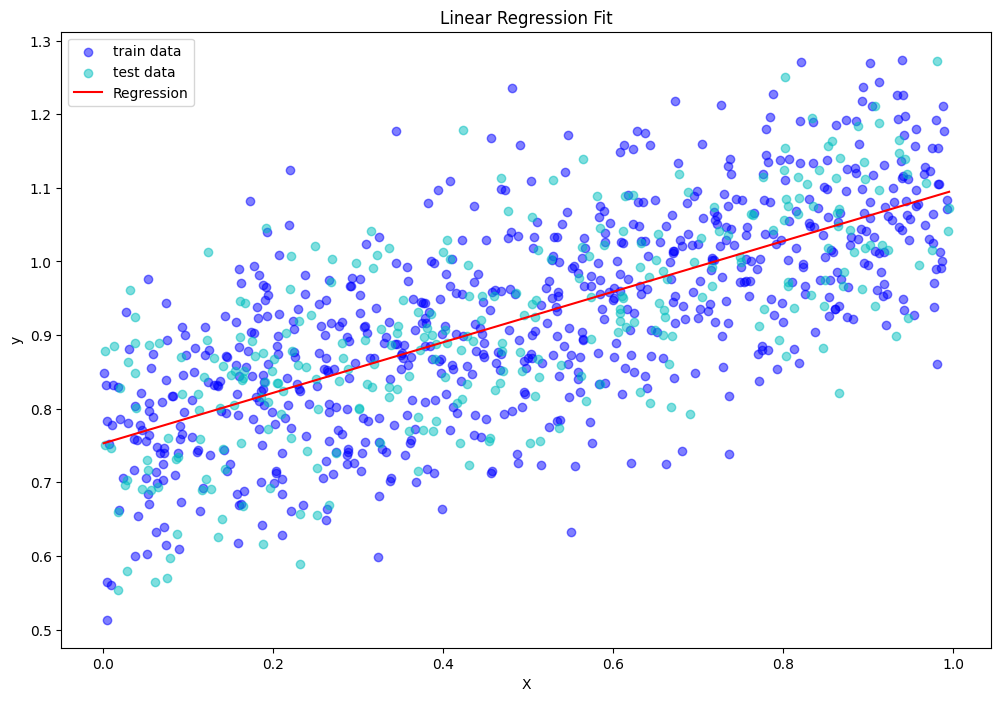

In [131]:
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)
plot_regression(my_model, X, X_train, y_train, X_test, y_test)

**Comparison step:** After visualising the custom model, you can compare its RMSE and coefficients to the scikit-learn implementation below.

### Fit scikit-learn's `LinearRegression` and visualise

This cell fits the standard scikit-learn estimator on the same training data and plots results to compare performance with the custom implementation.

RMSE on test set: 0.1013
RMSE on test set: 0.0982
Estimated slope: 0.3435
Estimated intercept: 0.7527


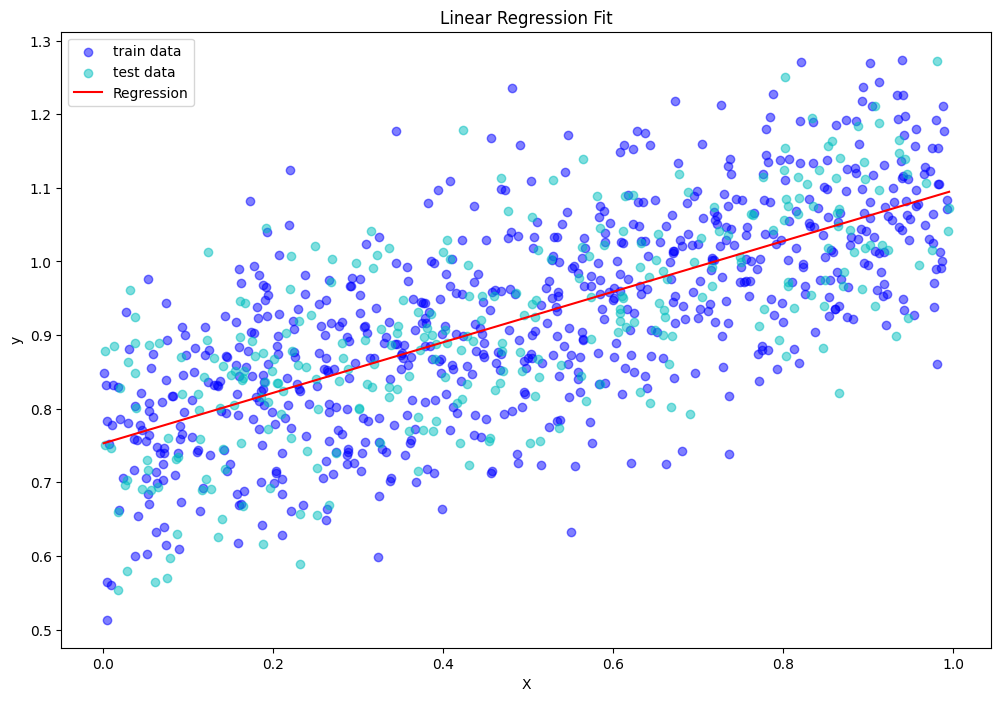

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)
plot_regression(model, X, X_train, y_train, X_test, y_test)